Análisis del despliegue de discursos discriminatorios y de odio durante la pandemia en TWITTER

LINK A FUENTE

LINK A ARTICULO

In [1]:

import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/2. Data-work/python-space/hate_speech/df_tweets_arg.csv'



Mounted at /content/drive


Tw_arg tiene ya solo los medios de Argentina

'LANACION',
'clarincom',
'cronica',
'infobae',
'izquierdadiario',
'laderechadiario',
'laderechamedios',
'pagina12',
'perfilcom'

In [3]:
tw_arg = pd.read_csv(file_path)

In [4]:
tw_arg.head()

,tweet_id_noticia,user_noticia,date_noticia,title_noticia,url_noticia,tweet,date_tweet,APPEARANCE,CLASS,CRIMINAL,DISABLED,LGBTI,POLITICS,RACISM,WOMEN,CALLS
0,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom A mi me preocupa el trabajo.. La ev...,2021-03-30 17:03:00.900,0,0,0,0,0,0,0,0,0
1,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Lo que preocupa. https://t.co/Vmf9V...,2021-03-30 17:05:04.500,0,0,0,0,0,0,0,0,0
2,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Lo que les preocupa. https://t.co/P...,2021-03-30 17:06:03.100,0,0,0,0,0,0,0,0,0
3,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Le recomendaríamos al presidente de...,2021-03-30 17:11:02.300,0,0,0,0,0,0,0,0,0
4,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Para salvar al correo de la quiebra...,2021-03-30 17:26:00.600,0,0,0,0,0,0,0,0,0


In [5]:
tw_arg['date_tweet'] = pd.to_datetime(tw_arg['date_tweet'])
tw_arg['date_only'] = tw_arg['date_tweet'].dt.date
daily_counts = tw_arg.groupby('date_only').size().reset_index(name='tweet_count')
daily_counts

,date_only,tweet_count
0,2020-02-10,4513
1,2020-02-11,2407
2,2020-02-12,1815
3,2020-02-13,4446
4,2020-02-14,5992
...,...,...
496,2021-06-21,5709
497,2021-06-22,3501
498,2021-06-23,52
499,2021-06-24,51


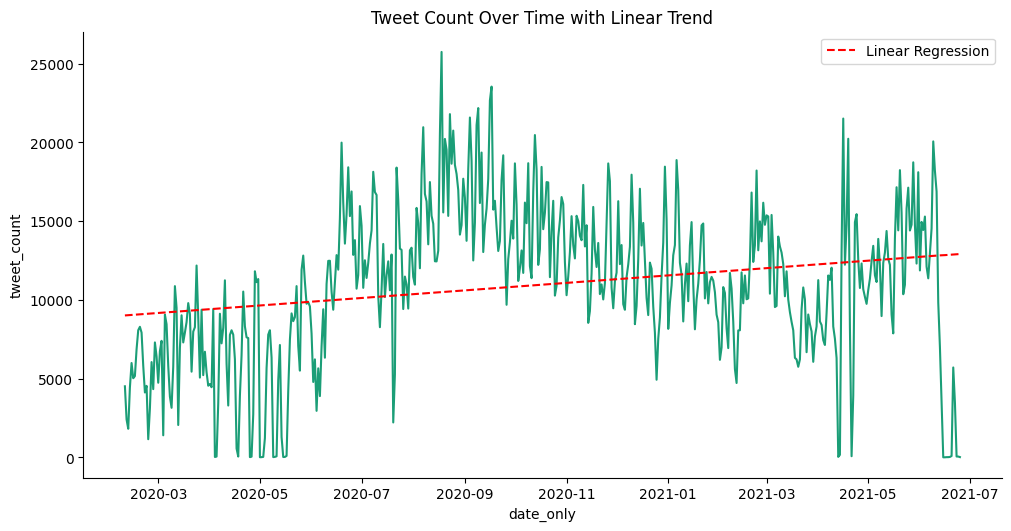

In [6]:

import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_only']
  ys = series['tweet_count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = daily_counts.sort_values('date_only', ascending=True)
_plot_series(df_sorted, '')

# Add a linear regression line
x = np.arange(len(df_sorted))
z = np.polyfit(x, df_sorted['tweet_count'], 1)
p = np.poly1d(z)
plt.plot(df_sorted['date_only'],p(x), color='red', linestyle='--', label='Linear Regression')


sns.despine(fig=fig, ax=ax)
plt.xlabel('date_only')
plt.ylabel('tweet_count')
plt.legend() # Show the legend
_ = plt.title('Tweet Count Over Time with Linear Trend') # Added title for clarity


In [7]:
hateful_columns = ['APPEARANCE', 'CLASS', 'CRIMINAL', 'DISABLED', 'LGBTI', 'POLITICS', 'RACISM', 'WOMEN']


In [8]:
tw_arg['HATEFUL'] = tw_arg[hateful_columns].any(axis=1)


In [9]:
# Calculate total cases for each hateful column
hateful_counts = tw_arg[hateful_columns].sum()
hateful_counts
#hateful_counts['APPEARANCE']

,0
APPEARANCE,106462
CLASS,24033
CRIMINAL,37583
DISABLED,44025
LGBTI,16883
POLITICS,93515
RACISM,35872
WOMEN,43742


In [10]:
total_cases = len(tw_arg)
total_cases

5493397

In [11]:
total_hateful = tw_arg['HATEFUL'].sum()
total_hateful


339025

In [12]:
total_calls = tw_arg['CALLS'].sum() if 'CALLS' in tw_arg.columns else 0

print(f"Total CALLS: {total_calls}")


Total CALLS: 21640


In [64]:
# Filter for rows where 'CALLS' is 1
calls_df = tw_arg[tw_arg['CALLS'] == 1]

# Calculate total cases for each hateful column where 'CALLS' is 1 and the hateful column is 1
hateful_counts_with_calls = calls_df[hateful_columns].sum()

hateful_counts_with_calls


,0
APPEARANCE,650
CLASS,2509
CRIMINAL,11865
DISABLED,177
LGBTI,178
POLITICS,4175
RACISM,5541
WOMEN,445


In [73]:
# prompt: bind hateful_counts and hateful_counts_with_calls

# Concatenate hateful_counts and hateful_counts_with_calls
combined_counts = pd.concat([hateful_counts, hateful_counts_with_calls], axis=1)
combined_counts.columns = ['counts', 'counts_calls']

# Display the combined counts
combined_counts


,counts,counts_calls
APPEARANCE,106462,650
CLASS,24033,2509
CRIMINAL,37583,11865
DISABLED,44025,177
LGBTI,16883,178
POLITICS,93515,4175
RACISM,35872,5541
WOMEN,43742,445


In [74]:
# Calculate the percentage and add it as a new column
combined_counts['pct_total_tw'] = (combined_counts['counts'] / total_cases) * 100
combined_counts['pct_hateful'] = (combined_counts['counts'] / total_hateful) * 100


# Display the updated combined counts
combined_counts


,counts,counts_calls,pct_total_tw,pct_hateful
APPEARANCE,106462,650,1.937999,31.402404
CLASS,24033,2509,0.437489,7.088858
CRIMINAL,37583,11865,0.684149,11.085613
DISABLED,44025,177,0.801417,12.985768
LGBTI,16883,178,0.307333,4.979869
POLITICS,93515,4175,1.702316,27.583512
RACISM,35872,5541,0.653002,10.580931
WOMEN,43742,445,0.796265,12.902293


In [75]:
# Save the combined_counts DataFrame to a CSV file
combined_counts.to_csv('combined_counts.csv', index=True)


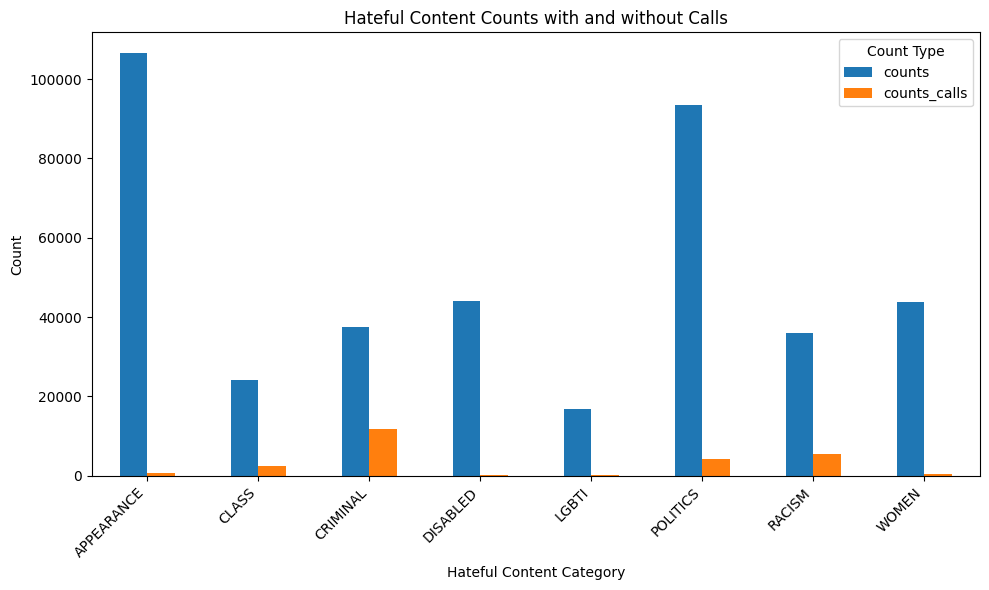

In [66]:
# prompt: crear un grafico de barras para combined_counts

import matplotlib.pyplot as plt

# Create the bar plot
combined_counts.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Hateful Content Counts with and without Calls')
plt.xlabel('Hateful Content Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Count Type')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()


In [63]:
# Calculate total cases for each hateful column where has 1 in the column and 1 in 'CALLS'
hateful_counts_calls = tw_arg[hateful_columns + ['CALLS']].sum()
hateful_counts_calls


,0
APPEARANCE,106462
CLASS,24033
CRIMINAL,37583
DISABLED,44025
LGBTI,16883
POLITICS,93515
RACISM,35872
WOMEN,43742
CALLS,21640


In [28]:
total_cases = len(tw_arg)
print(f"Total number of cases in tw_arg: {total_cases}")


Total number of cases in tw_arg: 5493397


In [34]:
total_hateful=tw_arg['HATEFUL'].sum()
total_calls=tw_arg['CALLS'].sum()


21640

In [61]:
# prompt: calcular para cada categoria de hateful_counts % usando total_hateful

# Calculate the percentage for each hateful category
hateful_percentages = (hateful_counts / total_hateful) * 100

# Print the results
hateful_percentages


,0
APPEARANCE,31.402404
CLASS,7.088858
CRIMINAL,11.085613
DISABLED,12.985768
LGBTI,4.979869
POLITICS,27.583512
RACISM,10.580931
WOMEN,12.902293


In [ ]:
hateful_counts

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import ListedColormap

# Definir los datos
total_responses = int(total_cases/10000)  # 500 cuadrados (5 millones de respuestas)
discriminatory = int(total_hateful/10000)    # 40 cuadrados
hate_speech = int(total_calls/10000)        # 5 cuadrados

# Compute optimal grid size (trying to keep it roughly square)
cols = math.ceil(math.sqrt(total_responses))  # Number of columns
rows = math.ceil(total_responses / cols)  # Number of rows


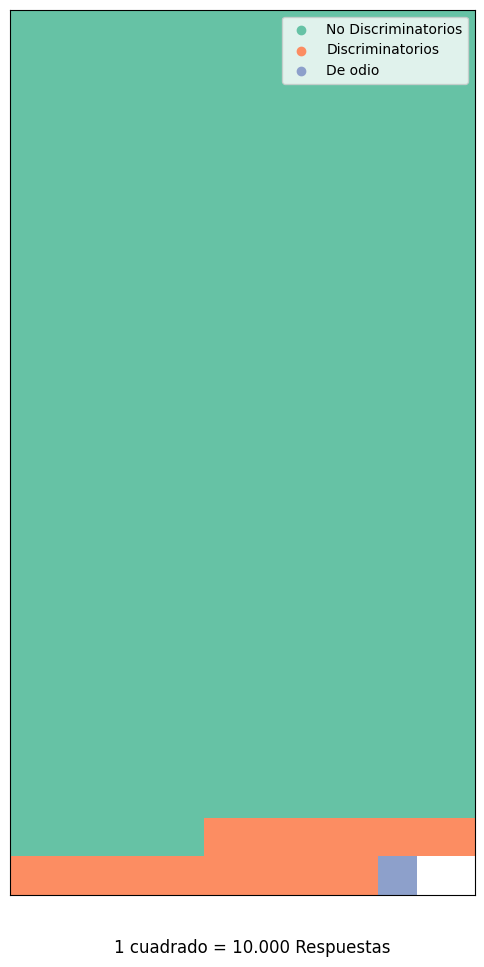

In [58]:

# Compute optimal grid size
cols = math.ceil(math.sqrt(total_responses))  # Try to keep a roughly square grid
rows = math.ceil(total_responses / cols)  # Number of rows

# Create the color categories
color_map = {
    "No Discriminatorios": "#66c2a5",  # Green
    "Discriminatorios": "#fc8d62",  # Orange
    "De odio": "#8da0cb",  # Blue
    "Padding": "#ffffff"  # White for empty cells
}

# Create an array of category labels
categories = (["No Discriminatorios"] * (total_responses - discriminatory - hate_speech) +
              ["Discriminatorios"] * discriminatory +
              ["De odio"] * hate_speech)

# Convert to NumPy array
categories = np.array(categories)

# Pad the array if needed
pad_size = (rows * cols) - total_responses
if pad_size > 0:
    categories = np.append(categories, ["Padding"] * pad_size)  # Add white padding

# Reshape the array
categories = categories.reshape(rows, cols)

# Convert category labels into numerical indices
unique_categories, category_indices = np.unique(categories, return_inverse=True)
category_indices = category_indices.reshape(rows, cols)

# Create a colormap
cmap = ListedColormap([color_map[cat] for cat in unique_categories])

# Plot the grid
fig, ax = plt.subplots(figsize=(cols / 4, rows / 2))  # Adjust figure size dynamically
ax.imshow(category_indices, cmap=cmap, aspect='auto')

# Remove axes
ax.set_xticks([])
ax.set_yticks([])

# Add legend
legend_labels = ["No Discriminatorios", "Discriminatorios", "De odio"]
legend_colors = [color_map[label] for label in legend_labels]

for i, label in enumerate(legend_labels):
    ax.scatter([], [], color=legend_colors[i], label=label)

ax.legend(loc='upper right')

# Add explanatory text
plt.text(cols // 2, rows + 1, "1 cuadrado = 10.000 Respuestas", ha='center', fontsize=12)

# Show plot
plt.show()

In [59]:
daily_hateful_counts = tw_arg[tw_arg['HATEFUL']].groupby('date_only').size().reset_index(name='hateful_count')


In [60]:
# prompt: save daily_hateful_counts to csv

daily_hateful_counts.to_csv('daily_hateful_counts.csv', index=False)


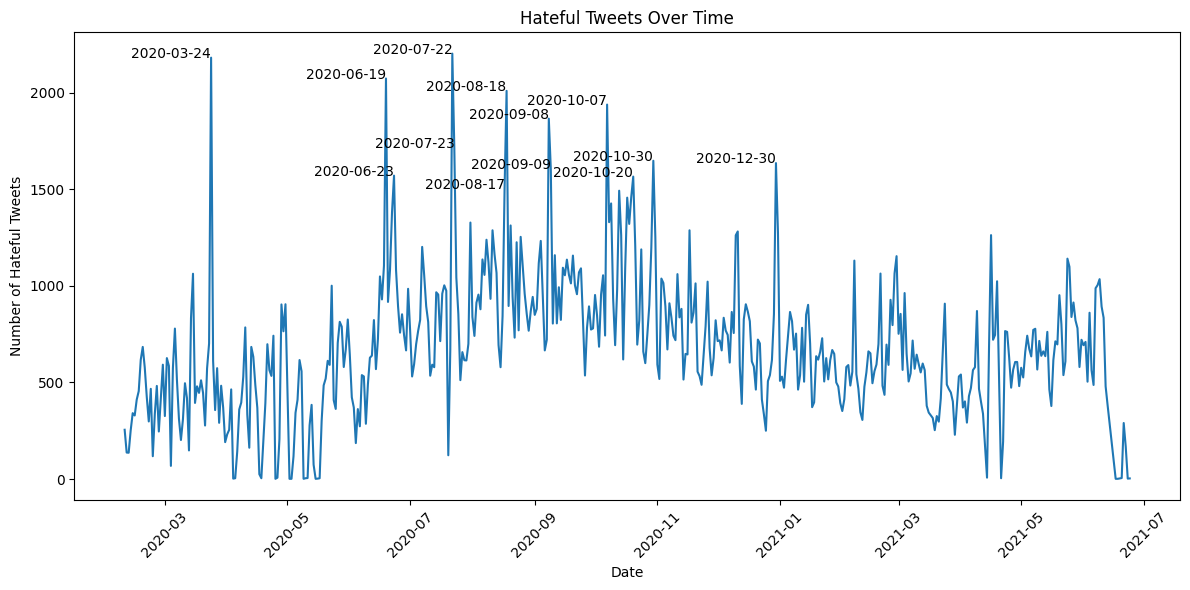

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(daily_hateful_counts['date_only'], daily_hateful_counts['hateful_count'])
plt.xlabel('Date')
plt.ylabel('Number of Hateful Tweets')
plt.title('Hateful Tweets Over Time')
plt.xticks(rotation=45)

# Add labels for dates with > 1500 hateful tweets
for index, row in daily_hateful_counts.iterrows():
  if row['hateful_count'] > 1500:
    plt.text(row['date_only'], row['hateful_count'], str(row['date_only']), rotation=0, ha='right')

plt.tight_layout()
plt.show()


In [26]:
daily_hateful_counts = tw_arg.groupby('date_only')['HATEFUL'].sum().reset_index(name='hateful_count')
daily_APPEARANCE_counts = tw_arg.groupby('date_only')['APPEARANCE'].sum().reset_index(name='APPEARANCE')
daily_CLASS_counts = tw_arg.groupby('date_only')['CLASS'].sum().reset_index(name='CLASS')
daily_CRIMINAL_counts = tw_arg.groupby('date_only')['CRIMINAL'].sum().reset_index(name='CRIMINAL')
daily_DISABLED_counts = tw_arg.groupby('date_only')['DISABLED'].sum().reset_index(name='DISABLED')
daily_LGBTI_counts = tw_arg.groupby('date_only')['LGBTI'].sum().reset_index(name='LGBTI')
daily_POLITICS_counts = tw_arg.groupby('date_only')['POLITICS'].sum().reset_index(name='POLITICS')
daily_RACISM_counts = tw_arg.groupby('date_only')['RACISM'].sum().reset_index(name='RACISM')
daily_WOMEN_counts = tw_arg.groupby('date_only')['WOMEN'].sum().reset_index(name='WOMEN')


In [ ]:
daily_hateful = pd.merge(daily_counts, daily_hateful_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_APPEARANCE_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_CRIMINAL_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_DISABLED_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_LGBTI_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_POLITICS_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_RACISM_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_WOMEN_counts, on='date_only', how='left')

daily_hateful.head()

,date_only,tweet_count,hateful_count,APPEARANCE,CRIMINAL,DISABLED,LGBTI,POLITICS,RACISM,WOMEN
0,2020-02-10,4513,255,60,37,23,10,78,46,19
1,2020-02-11,2407,137,60,10,21,5,39,8,14
2,2020-02-12,1815,136,28,25,7,14,33,37,20
3,2020-02-13,4446,252,57,19,28,30,86,23,39
4,2020-02-14,5992,341,100,18,42,33,90,29,66


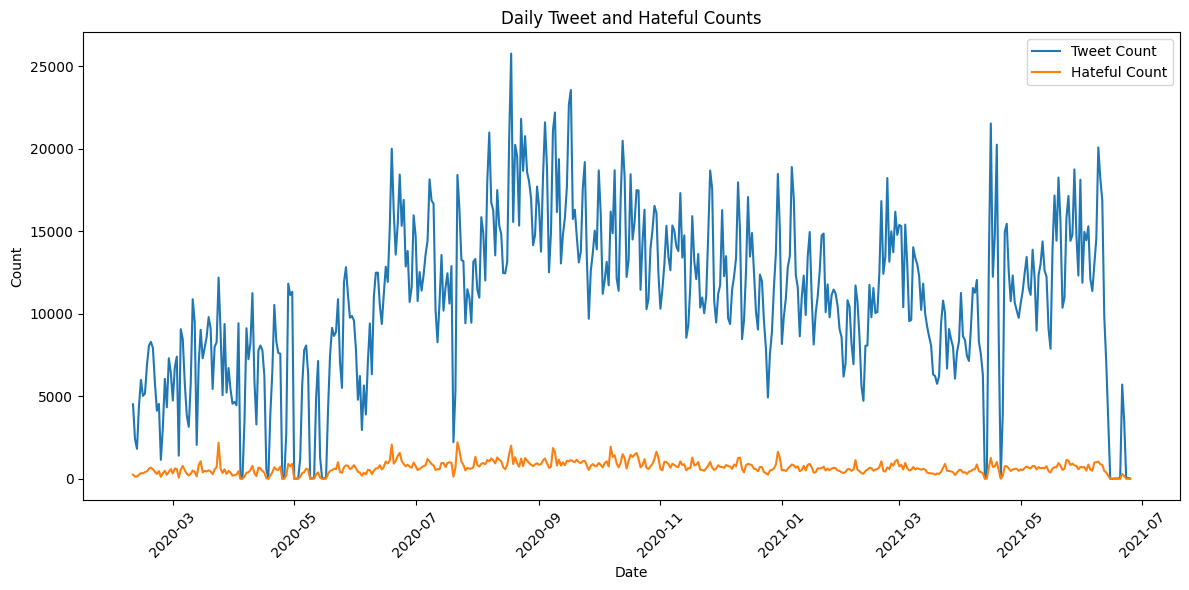

In [ ]:
# prompt: plot tweet_count and hateful_count from daily_hateful_counts by date_only

import matplotlib.pyplot as plt

# Assuming daily_hateful DataFrame is already created as in the provided code

plt.figure(figsize=(12, 6))
plt.plot(daily_hateful['date_only'], daily_hateful['tweet_count'], label='Tweet Count')
plt.plot(daily_hateful['date_only'], daily_hateful['hateful_count'], label='Hateful Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Tweet and Hateful Counts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Assuming daily_hateful DataFrame is already created as in the provided code
file_path_output = '/content/drive/MyDrive/2. Data-work/python-space/hate_speech/daily_hateful.csv' #@param {type:"string"}
daily_hateful.to_csv(file_path_output, index=False)

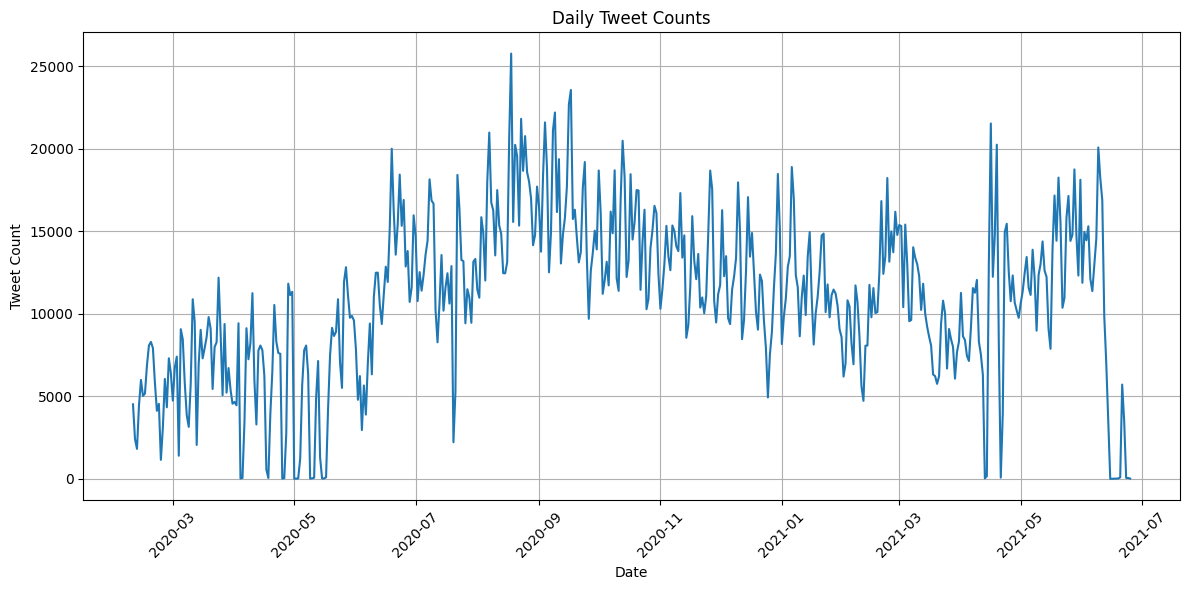

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(daily_counts['date_only'], daily_counts['tweet_count'])

# Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Counts')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()

In [ ]:
# prompt: calcular cantidad de 1 en  de cada feature: APPEARANCE	CLASS	CRIMINAL	DISABLED	LGBTI	POLITICS RACISM	WOMEN	CALLS

hateful_columns = ['APPEARANCE', 'CLASS', 'CRIMINAL', 'DISABLED', 'LGBTI', 'POLITICS', 'RACISM', 'WOMEN', 'CALLS']

# Calculate the sum of 1s for each hateful column
hate_counts = tw_arg[hateful_columns].sum()

hate_counts